In [43]:
import pandas as pd
from newspaper import Article
import nltk
import ast
import requests
from tqdm.auto import tqdm
tqdm.pandas()
from bs4 import BeautifulSoup, Comment

In [44]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [ ]:
initial_tweet_path = 'KathmanduPost/tweets.csv'
file_path = "KathmanduPost.csv"
result_file_path = "KathmanduPost_articles.csv"

In [3]:
df = pd.read_csv(initial_tweet_path, usecols=['id', 'created_at', 'urls'], parse_dates=['created_at'])

In [4]:
list(df)

['id', 'created_at', 'urls']

In [5]:
df.shape

(41312, 3)

In [6]:
df.head()

,id,created_at,urls
0,1377040443498758144,2021-03-31 05:15:00+05:45,['https://tkpo.st/3fmCWdf']
1,1377014018037190664,2021-03-31 03:30:00+05:45,['https://tkpo.st/3diq0SX']
2,1376992627166490625,2021-03-31 02:05:00+05:45,['https://tkpo.st/3cxxm64']
3,1376968719620923403,2021-03-31 00:30:00+05:45,['https://tkpo.st/3sMETmQ']
4,1376943554061348864,2021-03-30 22:50:00+05:45,['http://tkpo.st/31u5qcO']


In [7]:
df.tail()

,id,created_at,urls
41307,947657136892346368,2018-01-01 08:19:02+05:45,['http://kathmandupost.ekantipur.com/news/2018...
41308,947654359294382080,2018-01-01 08:08:00+05:45,['http://kathmandupost.ekantipur.com/news/2018...
41309,947652345613246464,2018-01-01 08:00:00+05:45,['http://kathmandupost.ekantipur.com/news/2017...
41310,947637246810775552,2018-01-01 07:00:00+05:45,['http://kathmandupost.ekantipur.com/news/2017...
41311,947622146783809537,2018-01-01 06:00:00+05:45,['http://kathmandupost.ekantipur.com/news/2017...


In [8]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2018-12-31 00:00:00+05:45,17941
2019-12-31 00:00:00+05:45,11026
2020-12-31 00:00:00+05:45,9906
2021-12-31 00:00:00+05:45,2439


<AxesSubplot:xlabel='created_at'>

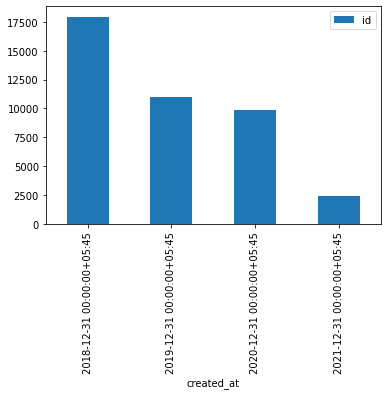

In [9]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

### Remove tweets without a URL

In [10]:
df=df[df.urls!="[]"]

In [11]:
df = df.drop_duplicates(['urls'], keep="last")

In [12]:
df

,id,created_at,urls
4,1376943554061348864,2021-03-30 22:50:00+05:45,['http://tkpo.st/31u5qcO']
7,1376880639417323524,2021-03-30 18:40:00+05:45,['https://tkpo.st/3sBwym6']
8,1376861721130790912,2021-03-30 17:24:49+05:45,['https://tkpo.st/3fnEiEw']
9,1376839351791804417,2021-03-30 15:55:56+05:45,['https://tkpo.st/3m2CBh7']
10,1376807388439699456,2021-03-30 13:48:55+05:45,['https://tkpo.st/31xfdPe']
...,...,...,...
41307,947657136892346368,2018-01-01 08:19:02+05:45,['http://kathmandupost.ekantipur.com/news/2018...
41308,947654359294382080,2018-01-01 08:08:00+05:45,['http://kathmandupost.ekantipur.com/news/2018...
41309,947652345613246464,2018-01-01 08:00:00+05:45,['http://kathmandupost.ekantipur.com/news/2017...
41310,947637246810775552,2018-01-01 07:00:00+05:45,['http://kathmandupost.ekantipur.com/news/2017...


In [13]:
df['article'] = None

In [14]:
def urlstourl(urls):
    return ast.literal_eval(urls)[0]

df['urls'] = df.urls.progress_apply(urlstourl)

In [15]:
df

,id,created_at,urls,article
4,1376943554061348864,2021-03-30 22:50:00+05:45,http://tkpo.st/31u5qcO,None
7,1376880639417323524,2021-03-30 18:40:00+05:45,https://tkpo.st/3sBwym6,None
8,1376861721130790912,2021-03-30 17:24:49+05:45,https://tkpo.st/3fnEiEw,None
9,1376839351791804417,2021-03-30 15:55:56+05:45,https://tkpo.st/3m2CBh7,None
10,1376807388439699456,2021-03-30 13:48:55+05:45,https://tkpo.st/31xfdPe,None
...,...,...,...,...
41307,947657136892346368,2018-01-01 08:19:02+05:45,http://kathmandupost.ekantipur.com/news/2018-0...,None
41308,947654359294382080,2018-01-01 08:08:00+05:45,http://kathmandupost.ekantipur.com/news/2018-0...,None
41309,947652345613246464,2018-01-01 08:00:00+05:45,http://kathmandupost.ekantipur.com/news/2017-1...,None
41310,947637246810775552,2018-01-01 07:00:00+05:45,http://kathmandupost.ekantipur.com/news/2017-1...,None


In [16]:
df.to_csv(file_path, index=False)

## Chunk

In [17]:
def article_ktmpost(url):
    try:
        req = requests.get(url, headers)
        soup = BeautifulSoup(req.content, 'html.parser')
        result = soup.find("div", {"class": "col-sm-8"})
        return result.text
    except Exception as e:
        print (str(e))
        return 404
    
def article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print (str(e))
        return 404        

In [18]:
pd.read_csv(file_path, nrows=1).head(0).to_csv(result_file_path)
dataframe = pd.read_csv(file_path, iterator=True, chunksize=1000)

for chunk in dataframe:
   chunk['article'] = chunk['urls'].progress_apply(article_ktmpost)
   chunk.to_csv(result_file_path, mode='a', header=None)

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'



'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'



'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'



'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
HTTPSConnectionPool(host='kathmandupost.com', port=443): Max retries exceeded with url: /news/2019-06-29/nepal-made-good-strides-in-reducing-maternal-mortality-rate-over-two-decades-and-then-hit-a-plateau.html (Caused by NewConnectionError('<ur

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

'NoneType' object has no attribute 'text'
('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
('Connection aborted.', RemoteDisconnect

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'



'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'



KeyboardInterrupt: 